## Project Introduction: Predicting Airbnb Listing Prices to Inform Strategic Decisions

This project aims to develop a predictive model for Airbnb listing prices using a dataset containing information about various listings. Understanding the factors that influence pricing is crucial for both hosts looking to optimize their pricing strategies and potential guests seeking to understand market values. By leveraging machine learning techniques, specifically regression modeling, we can identify key features that significantly impact listing prices and build a model capable of predicting prices for new or existing listings.

The dataset used in this project is substantial, containing over 230,000 Airbnb listings with 18 different attributes. These attributes encompass numerical information such as location coordinates, minimum stay requirements, review metrics, and availability, as well as categorical data like room type, neighborhood, and city.

**Our methodology involves several key steps:** Data preprocessing to handle categorical variables, splitting the data into training and testing sets to evaluate model performance on unseen data, and training and comparing the performance of different regression models. We began with a simple Linear Regression model to establish a baseline and then explored more complex models like Decision Tree and Random Forest Regressors, which are capable of capturing non-linear relationships within the data. The performance of each model was rigorously evaluated using metrics such as R² score, Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE).

The insights gained from this project can be valuable for:

- **Airbnb Hosts:** To understand how different listing characteristics influence pricing and to make informed decisions about pricing strategies to maximize occupancy and revenue.

- **Potential Guests:** To gain a better understanding of the factors that contribute to Airbnb prices in different locations and for different types of listings.

- **Market Analysis:** To identify pricing trends and understand the dynamics of the Airbnb market in the studied region.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style 
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [31]:
df = pd.read_csv("F:\Data_Analytics\Datasets\Airbnb\Airbnb_us.csv")

In [32]:
df.shape

(232147, 18)

In [33]:
df.head()

id                                               name  host_id  \
0   958              Bright, Modern Garden Unit - 1BR/1BTH     1169   
1  5858                                 Creative Sanctuary     8904   
2  8142  Friendly Room Apt. Style -UCSF/USF - San Franc...    21994   
3  8339                    Historic Alamo Square Victorian    24215   
4  8739                Mission Sunshine, with Private Bath     7149   

          host_name neighbourhood_group     neighbourhood  latitude  \
0             Holly                 NaN  Western Addition  37.77028   
1  Philip And Tania                 NaN    Bernal Heights  37.74474   
2             Aaron                 NaN    Haight Ashbury  37.76555   
3              Rosy                 NaN  Western Addition  37.77564   
4      Ivan & Wendy                 NaN           Mission  37.76030   

   longitude        room_type  price  minimum_nights  number_of_reviews  \
0 -122.43317  Entire home/apt    202               2                383   
1 -122.42089  Entire home/apt    235              30                111   
2 -122.45213     Private room     56              32                  9   
3 -122.43642  Entire home/apt    575               9                 28   
4 -122.42197     Private room    110               1                770   

  last_review  reviews_per_month  calculated_host_listings_count  \
0  2023-02-19               2.31                               1   
1  2017-08-06               0.66                               1   
2  2022-10-27               0.09                              13   
3  2019-06-28               0.17                               2   
4  2023-02-25               4.65                               2   

   availability_365  number_of_reviews_ltm           city  
0               128                     59  San Francisco  
1               365                      0  San Francisco  
2               365                      1  San Francisco  
3               365                      0  San Francisco  
4               159                     34  San Francisco

In [34]:
df.tail()

id                                               name  \
232142  849230448624862502  Private Half Moon Bay Oasis By Pillar Point Be...   
232143  850805127216414630                                      Home near SFO   
232144  851562104616413652                   Modern New Private Studio in SFO   
232145  851792795339759410            Lux Bedroom with a Shared Bath near SFO   
232146  851801296770555568             Lux Bedroom with Private Bath near SFO   

          host_id   host_name neighbourhood_group         neighbourhood  \
232142   29395385      Khalid                 NaN  Unincorporated Areas   
232143  440957696   Christina                 NaN             San Bruno   
232144   41574587      Vality                 NaN   South San Francisco   
232145   73133543  Stephannie                 NaN   South San Francisco   
232146   73133543  Stephannie                 NaN   South San Francisco   

         latitude   longitude        room_type  price  minimum_nights  \
232142  37.506164 -122.476188  Entire home/apt    389               2   
232143  37.623630 -122.426570  Entire home/apt    158               1   
232144  37.655661 -122.413130  Entire home/apt     97               1   
232145  37.644792 -122.454213     Private room     62               2   
232146  37.642655 -122.452391     Private room     85               2   

        number_of_reviews last_review  reviews_per_month  \
232142                  0         NaN                NaN   
232143                  0         NaN                NaN   
232144                  0         NaN                NaN   
232145                  0         NaN                NaN   
232146                  0         NaN                NaN   

        calculated_host_listings_count  availability_365  \
232142                               1               365   
232143                               1               364   
232144                              32               359   
232145                               3                67   
232146                               3                69   

        number_of_reviews_ltm              city  
232142                      0  San Mateo County  
232143                      0  San Mateo County  
232144                      0  San Mateo County  
232145                      0  San Mateo County  
232146                      0  San Mateo County

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232147 entries, 0 to 232146
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              232147 non-null  int64  
 1   name                            232131 non-null  object 
 2   host_id                         232147 non-null  int64  
 3   host_name                       232134 non-null  object 
 4   neighbourhood_group             96500 non-null   object 
 5   neighbourhood                   232147 non-null  object 
 6   latitude                        232147 non-null  float64
 7   longitude                       232147 non-null  float64
 8   room_type                       232147 non-null  object 
 9   price                           232147 non-null  int64  
 10  minimum_nights                  232147 non-null  int64  
 11  number_of_reviews               232147 non-null  int64  
 12  last_review     

In [36]:
print('Number of duplicate rows is ', df.duplicated().sum())

Number of duplicate rows is  0


In [37]:
df.drop(['id', 'host_name', 'neighbourhood_group'], axis=1, inplace=True)

In [38]:
df.describe()

host_id       latitude      longitude          price  \
count  2.321470e+05  232147.000000  232147.000000  232147.000000   
mean   1.582248e+08      36.610585     -98.301436     259.468001   
std    1.587164e+08       5.126523      19.706929    1024.645918   
min    2.300000e+01      25.957323    -123.089130       0.000000   
25%    2.299242e+07      33.976225    -118.315111      91.000000   
50%    1.005783e+08      36.190556     -97.727670     149.000000   
75%    2.686930e+08      40.717440     -77.026222     250.000000   
max    5.069384e+08      47.734010     -70.996000  100000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count   232147.000000      232147.000000      183062.000000   
mean        13.495867          40.915230           1.638348   
std         27.920631          80.649152           1.910812   
min          1.000000           0.000000           0.010000   
25%          2.000000           1.000000           0.310000   
50%          3.000000           9.000000           1.000000   
75%         30.000000          43.000000           2.420000   
max       1250.000000        3091.000000         101.420000   

       calculated_host_listings_count  availability_365  number_of_reviews_ltm  
count                   232147.000000     232147.000000          232147.000000  
mean                        29.879055        180.985686              11.689701  
std                        106.013665        134.715299              20.599954  
min                          1.000000          0.000000               0.000000  
25%                          1.000000         52.000000               0.000000  
50%                          2.000000        175.000000               3.000000  
75%                         10.000000        321.000000              16.000000  
max                       1003.000000        365.000000            1314.000000

In [39]:
round(df.describe(include='all'),3).T

count  unique  \
name                              232131  220164   
host_id                         232147.0     NaN   
neighbourhood                     232147    1412   
latitude                        232147.0     NaN   
longitude                       232147.0     NaN   
room_type                         232147       4   
price                           232147.0     NaN   
minimum_nights                  232147.0     NaN   
number_of_reviews               232147.0     NaN   
last_review                       183062    3147   
reviews_per_month               183062.0     NaN   
calculated_host_listings_count  232147.0     NaN   
availability_365                232147.0     NaN   
number_of_reviews_ltm           232147.0     NaN   
city                              232147      27   

                                                            top    freq  \
name                            Presidential Suite In A Mansion     150   
host_id                                                     NaN     NaN   
neighbourhood                              Unincorporated Areas   11882   
latitude                                                    NaN     NaN   
longitude                                                   NaN     NaN   
room_type                                       Entire home/apt  169142   
price                                                       NaN     NaN   
minimum_nights                                              NaN     NaN   
number_of_reviews                                           NaN     NaN   
last_review                                          2023-03-05    5008   
reviews_per_month                                           NaN     NaN   
calculated_host_listings_count                              NaN     NaN   
availability_365                                            NaN     NaN   
number_of_reviews_ltm                                       NaN     NaN   
city                                              New York City   42931   

                                         mean            std      min  \
name                                      NaN            NaN      NaN   
host_id                         158224798.875  158716378.002     23.0   
neighbourhood                             NaN            NaN      NaN   
latitude                               36.611          5.127   25.957   
longitude                             -98.301         19.707 -123.089   
room_type                                 NaN            NaN      NaN   
price                                 259.468       1024.646      0.0   
minimum_nights                         13.496         27.921      1.0   
number_of_reviews                      40.915         80.649      0.0   
last_review                               NaN            NaN      NaN   
reviews_per_month                       1.638          1.911     0.01   
calculated_host_listings_count         29.879        106.014      1.0   
availability_365                      180.986        134.715      0.0   
number_of_reviews_ltm                   11.69           20.6      0.0   
city                                      NaN            NaN      NaN   

                                       25%          50%          75%  \
name                                   NaN          NaN          NaN   
host_id                         22992416.0  100578284.0  268693041.5   
neighbourhood                          NaN          NaN          NaN   
latitude                            33.976       36.191       40.717   
longitude                         -118.315      -97.728      -77.026   
room_type                              NaN          NaN          NaN   
price                                 91.0        149.0        250.0   
minimum_nights                         2.0          3.0         30.0   
number_of_reviews                      1.0          9.0         43.0   
last_review                            NaN          NaN          NaN   
reviews_per_month                     0.

In [40]:
df['room_type'].nunique()

4

In [41]:
for column in df.columns:
    if column == 'room_type':
        print(column.upper(), ':', df['room_type'].nunique())
        print(df[column].value_counts())
        print()

ROOM_TYPE : 4
Entire home/apt    169142
Private room        59759
Shared room          2276
Hotel room            970
Name: room_type, dtype: int64



In [42]:
df.columns

Index(['name', 'host_id', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'city'],
      dtype='object')

### 2. Data Cleaning Steps

- Remove duplicate rows.
- Handle missing values (drop or fill).
- Convert data types if necessary.

In [43]:
df_2 = df.copy()

In [44]:
df_2

name    host_id  \
0                   Bright, Modern Garden Unit - 1BR/1BTH       1169   
1                                      Creative Sanctuary       8904   
2       Friendly Room Apt. Style -UCSF/USF - San Franc...      21994   
3                         Historic Alamo Square Victorian      24215   
4                     Mission Sunshine, with Private Bath       7149   
...                                                   ...        ...   
232142  Private Half Moon Bay Oasis By Pillar Point Be...   29395385   
232143                                      Home near SFO  440957696   
232144                   Modern New Private Studio in SFO   41574587   
232145            Lux Bedroom with a Shared Bath near SFO   73133543   
232146             Lux Bedroom with Private Bath near SFO   73133543   

               neighbourhood   latitude   longitude        room_type  price  \
0           Western Addition  37.770280 -122.433170  Entire home/apt    202   
1             Bernal Heights  37.744740 -122.420890  Entire home/apt    235   
2             Haight Ashbury  37.765550 -122.452130     Private room     56   
3           Western Addition  37.775640 -122.436420  Entire home/apt    575   
4                    Mission  37.760300 -122.421970     Private room    110   
...                      ...        ...         ...              ...    ...   
232142  Unincorporated Areas  37.506164 -122.476188  Entire home/apt    389   
232143             San Bruno  37.623630 -122.426570  Entire home/apt    158   
232144   South San Francisco  37.655661 -122.413130  Entire home/apt     97   
232145   South San Francisco  37.644792 -122.454213     Private room     62   
232146   South San Francisco  37.642655 -122.452391     Private room     85   

        minimum_nights  number_of_reviews last_review  reviews_per_month  \
0                    2                383  2023-02-19               2.31   
1                   30                111  2017-08-06               0.66   
2                   32                  9  2022-10-27               0.09   
3                    9                 28  2019-06-28               0.17   
4                    1                770  2023-02-25               4.65   
...                ...                ...         ...                ...   
232142               2                  0         NaN                NaN   
232143               1                  0         NaN                NaN   
232144               1                  0         NaN                NaN   
232145               2                  0         NaN                NaN   
232146               2                  0         NaN                NaN   

        calculated_host_listings_count  availability_365  \
0                                    1               128   
1                                    1               365   
2                                   13               365   
3                                    2               365   
4                                    2               159   
...                                ...               ...   
232142                               1               365   
232143                               1               364   
232144                              32               359   
232145                               3                67   
232146                               3                69   

        number_of_reviews_ltm              city  
0                          59     San Francisco  
1                           0     San Francisco  
2                           1     San Francisco  
3                           0     San Francisco  
4                          34     San Francisco  
...                       ...               ...  
232142                      0  San Mateo County  
232143                      0  San Mateo County  
232144                      0  San Mateo County  
232145                      0  San Mateo County  
232146                      0  San Mateo County  

[232

In [16]:
# df_2 = df_2.rename(columns={'room_type_Entire home/apt': 'room_type_Entire_home/apt', 'room_type_Hotel room': 'room_type_Hotel_room', 'room_type_Private room': 'room_type_Private_room', 'room_type_Shared room': 'room_type_Shared_room'})

In [50]:
""" df_2 = pd.get_dummies(df_2, columns=['room_type'], drop_first=False) """

In [59]:
""" # List of room type columns
room_type_columns = [col for col in df_2.columns if col.startswith('room_type')]

# Revert to the original categorical column
df_2['room_type'] = df_2[room_type_columns].idxmax(axis=1).str.replace('room_type_', '')

# Drop the individual one-hot columns
df_2 = df_2.drop(columns=room_type_columns) """

In [45]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232147 entries, 0 to 232146
Data columns (total 15 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   name                            232131 non-null  object 
 1   host_id                         232147 non-null  int64  
 2   neighbourhood                   232147 non-null  object 
 3   latitude                        232147 non-null  float64
 4   longitude                       232147 non-null  float64
 5   room_type                       232147 non-null  object 
 6   price                           232147 non-null  int64  
 7   minimum_nights                  232147 non-null  int64  
 8   number_of_reviews               232147 non-null  int64  
 9   last_review                     183062 non-null  object 
 10  reviews_per_month               183062 non-null  float64
 11  calculated_host_listings_count  232147 non-null  int64  
 12  availability_365

In [46]:
# Impute 'reviews_per_month' with 0 and 'last_review' with 'No reviews'
df_2['reviews_per_month'] = df_2['reviews_per_month'].fillna(0)
df_2['last_review'] = df_2['last_review'].fillna('No reviews')

df_2['name'] = df_2['name'].fillna('no_name')

In [47]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232147 entries, 0 to 232146
Data columns (total 15 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   name                            232147 non-null  object 
 1   host_id                         232147 non-null  int64  
 2   neighbourhood                   232147 non-null  object 
 3   latitude                        232147 non-null  float64
 4   longitude                       232147 non-null  float64
 5   room_type                       232147 non-null  object 
 6   price                           232147 non-null  int64  
 7   minimum_nights                  232147 non-null  int64  
 8   number_of_reviews               232147 non-null  int64  
 9   last_review                     232147 non-null  object 
 10  reviews_per_month               232147 non-null  float64
 11  calculated_host_listings_count  232147 non-null  int64  
 12  availability_365

In [48]:
df_2.isnull().sum()

name                              0
host_id                           0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
city                              0
dtype: int64

### Visualizations

**A. Price Distribution**

Text(0.5, 1.0, 'Boxplot of Airbnb Prices')

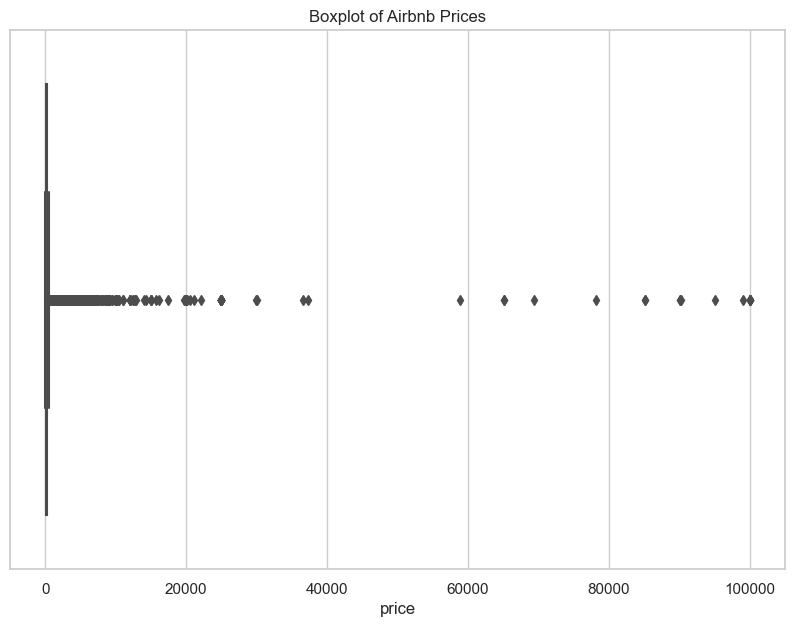

In [49]:
# Boxplot for outliers in price

plt.figure(figsize=(10, 7))
sns.boxplot(x=df_2['price'])
plt.title("Boxplot of Airbnb Prices")

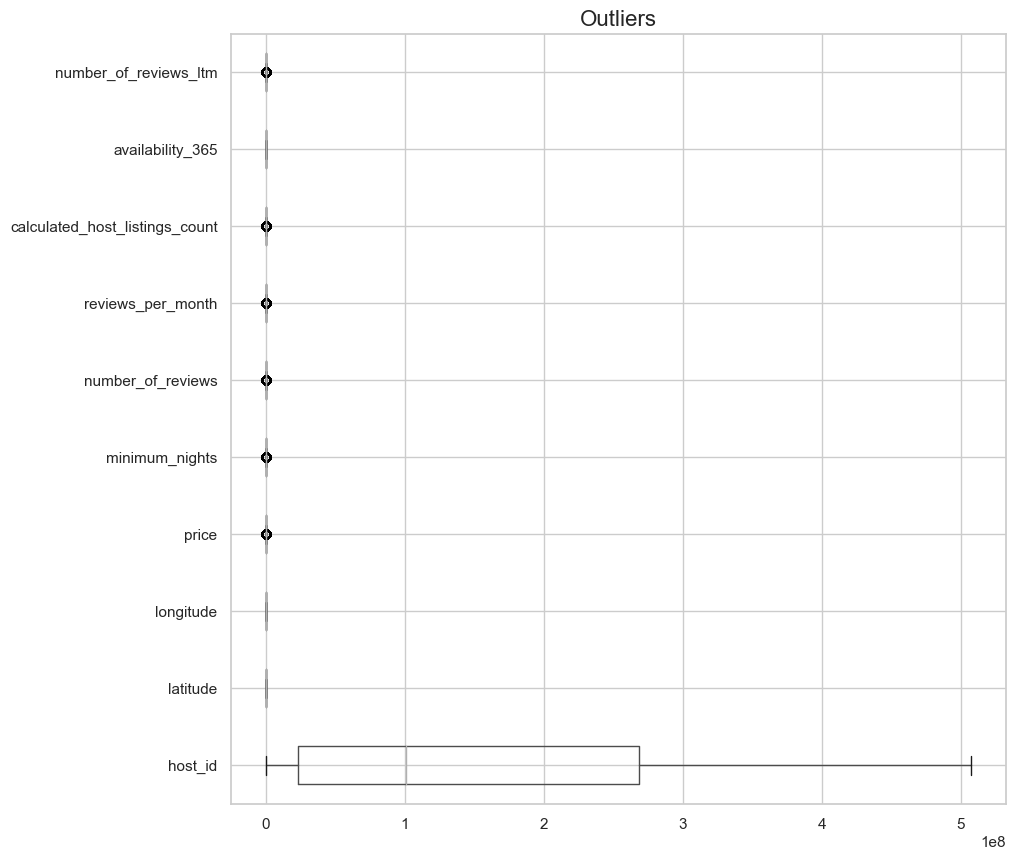

In [50]:
plt.figure(figsize=(10,10))
df_2.boxplot(vert=0)
plt.title('Outliers', fontsize=16)
plt.show()

In [51]:
import numpy as np

def remove_outlier(col):
    # Ensure the column contains numeric data
    if not np.issubdtype(col.dtype, np.number):
        return None, None  # Return None if the column is not numeric

    # Calculate the first and third quartiles (Q1 and Q3)
    Q1, Q3 = np.percentile(col, [25, 75])
    
    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1
    
    # Calculate the lower and upper bounds for outliers
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    
    return lower_range, upper_range


In [52]:
for column in df_2.columns:
    # Get the lower and upper bounds for the current column
    lr, ur = remove_outlier(df_2[column])
    
    # Replace values in the column that are outside the bounds with the nearest bound
    df_2[column] = np.where(df_2[column] > ur, ur, df_2[column])  # Cap values above the upper bound
    df_2[column] = np.where(df_2[column] < lr, lr, df_2[column])  # Cap values below the lower bound

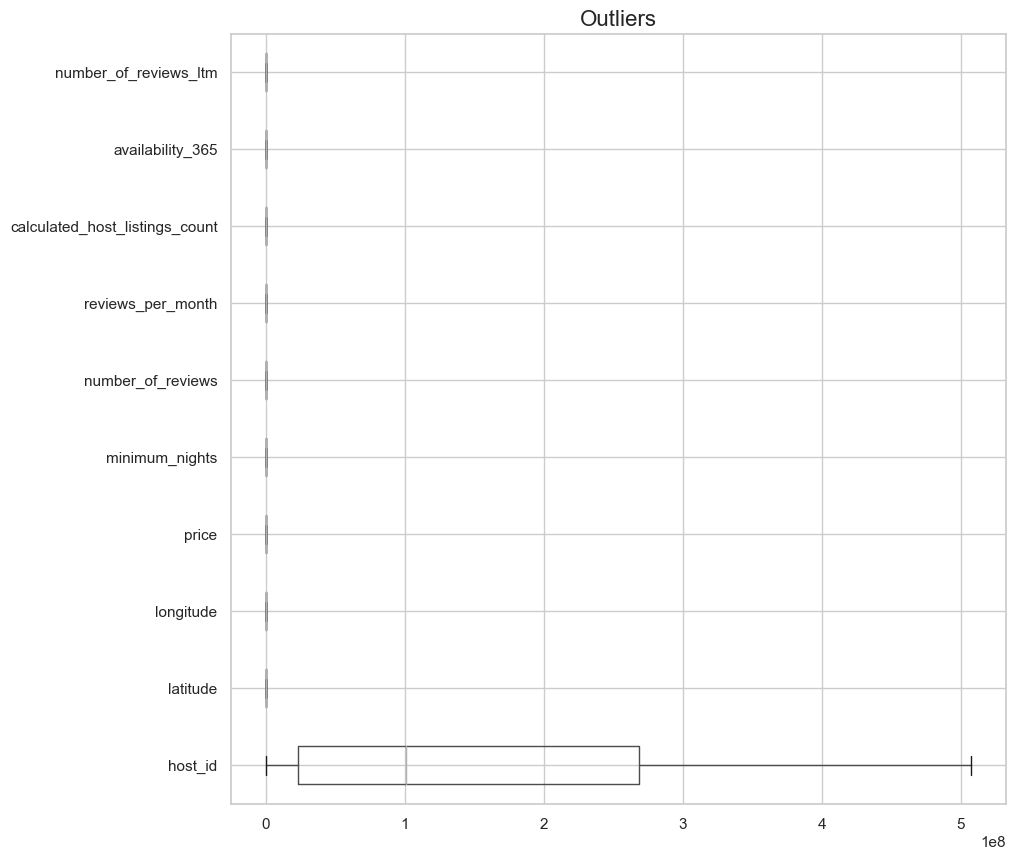

In [53]:
plt.figure(figsize=(10,10))
df_2.boxplot(vert=0)
plt.title('Outliers', fontsize=16)
plt.show()

In [54]:
print(df_2['neighbourhood'].dtype)  # Should print 'object' (or 'category' if the column is categorical)

# Replace numbers (as strings) with 'Unknown'
df_2['neighbourhood'] = df_2['neighbourhood'].apply(lambda x: 'Unknown' if x.isdigit() else x)

object


In [ ]:
print(df_2['neighbourhood'].unique())
df_2['neighbourhood'] = df_2['neighbourhood'].astype(str)

df_2['neighbourhood'] = df_2['neighbourhood'].str.strip()  # Remove leading/trailing spaces

print(df_2['neighbourhood'].isnull().sum())  # This will show the number of missing values

['Western Addition' 'Bernal Heights' 'Haight Ashbury' ... 'East Palo Alto'
 'Millbrae' 'Colma']
0


In [56]:
# Count the number of listings in each neighborhood group and store the result in a Pandas series
counts = df_2['neighbourhood'].value_counts()

# Reset the index of the series so that the neighborhood groups become columns in the resulting dataframe
Top_Neighborhood = counts.reset_index()

# Rename the columns of the dataframe to be more descriptive
Top_Neighborhood.columns = ['Neighborhood', 'Listing_Counts']

# display the resulting DataFrame
Top_Neighborhood

Neighborhood  Listing_Counts
0                  Unknown           17529
1     Unincorporated Areas           11882
2                Hollywood            6005
3          Fort Lauderdale            4314
4       Bedford-Stuyvesant            3086
...                    ...             ...
1356  Tijuana River Valley               1
1357       Thomy Locust Pl               1
1358                Ward 6               1
1359              Burnside               1
1360              Bartlett               1

[1361 rows x 2 columns]

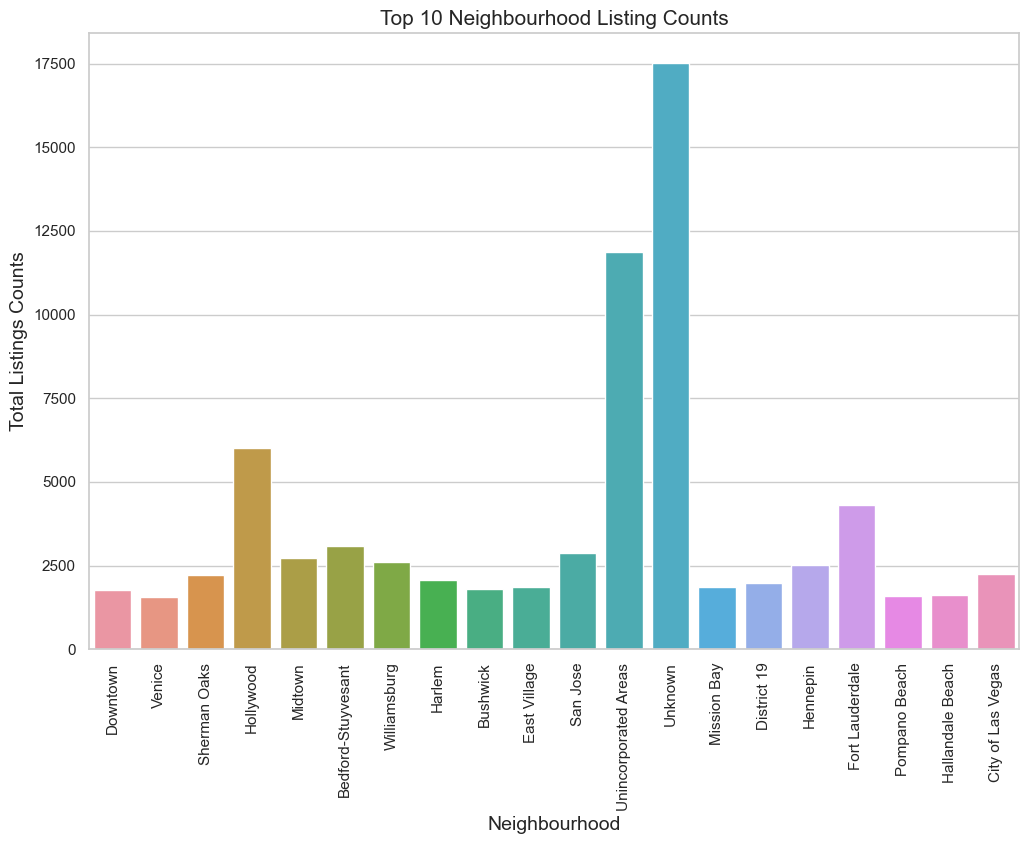

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 10 neighborhoods by the count of listings
top_neighborhoods = df_2['neighbourhood'].value_counts().nlargest(20).index

# Filter the dataframe to only include these top 10 neighborhoods
top_neighborhood_data = df_2[df_2['neighbourhood'].isin(top_neighborhoods)]

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a countplot of the top 10 neighborhoods
sns.countplot(x='neighbourhood', data=top_neighborhood_data)

# Set the title of the plot
plt.title('Top 10 Neighbourhood Listing Counts', fontsize=15)

# Set the x-axis label
plt.xlabel('Neighbourhood', fontsize=14)

# Set the y-axis label
plt.ylabel('Total Listings Counts', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

### Insights from the "Top 10 Neighbourhood Listing Counts" Chart

##### Highest Listings:

- The "Unknown" category has the highest number of listings, exceeding 17,500. This suggests incomplete data or listings that are not properly categorized.
- "Unincorporated Areas" follows, with around 12,500 listings, indicating significant Airbnb activity outside official city neighborhoods.

##### Popular Neighborhoods:

- "Hollywood" has the highest count among named neighborhoods, with over 5,500 listings. This aligns with its tourism appeal.
- Other high-listing areas include "San Jose" and "Fort Lauderdale," suggesting strong rental markets in those regions.

##### Moderate Listing Counts:

- Neighborhoods like "Sherman Oaks," "Midtown," and "Bedford-Stuyvesant" have moderate listings between 2,500 and 3,500.

##### Low Listing Counts:

- Some neighborhoods, like "Mission Bay," "District 19," and "Hennepin," have relatively lower listing counts. These areas might have fewer short-term rentals or stricter regulations.

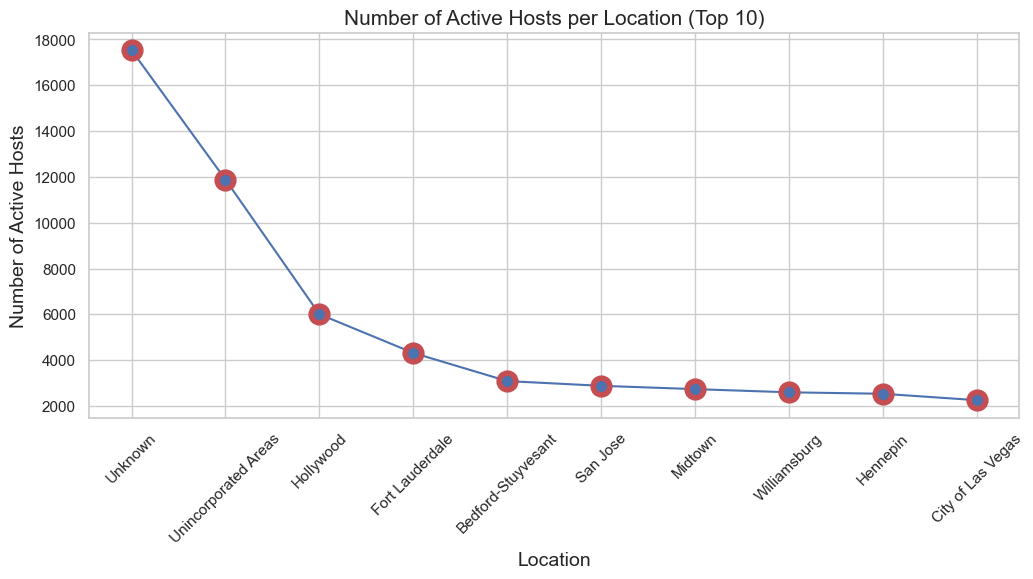

In [58]:
# Group the data by 'neighbourhood' and count the number of listings for each group
hosts_per_location = df_2.groupby('neighbourhood')['name'].count()

# Get the top 10 neighborhoods with the highest number of listings
top_10_locations = hosts_per_location.nlargest(10)

# Get the list of top 10 neighborhood names
locations = top_10_locations.index

# Get the list of host counts for each neighborhood
host_counts = top_10_locations.values

# Set the figure size
plt.figure(figsize=(12, 5))

# Create the line chart with markers
plt.plot(locations, host_counts, marker='o', ms=12, mew=4, mec='r')

# Add a title and labels to the x-axis and y-axis
plt.title('Number of Active Hosts per Location (Top 10)', fontsize='15')
plt.xlabel('Location', fontsize='14')
plt.ylabel('Number of Active Hosts', fontsize='14')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

### Insights from the "Number of Active Hosts per Location (Top 10)" Chart

##### Dominance of "Unknown" and "Unincorporated Areas"

- The "Unknown" category has the highest number of active hosts, exceeding 17,500. This may indicate data quality issues or a large number of unclassified hosts.
- "Unincorporated Areas" follows with around 12,000 active hosts, showing strong Airbnb activity in non-urban or loosely regulated zones.

##### Hollywood as a Major Hub

- "Hollywood" has the third-highest number of active hosts (~6,000), reinforcing its popularity as a short-term rental hotspot.

##### Moderate to Low Active Hosts

- Locations such as "Fort Lauderdale," "Bedford-Stuyvesant," and "San Jose" have between 2,500 to 4,000 hosts, indicating a steady but lower level of participation compared to top locations.
- The number of hosts gradually declines in "Midtown," "Williamsburg," "Hennepin," and "City of Las Vegas," suggesting lower Airbnb activity in these areas.

In [59]:
# create a new DataFrame that displays the average price of Airbnb rentals in each neighborhood
nbd_avg_price = df_2.groupby("neighbourhood").mean().reset_index().rename(columns={"price": "avg_price"})[['neighbourhood', 'avg_price']]

# select the top 10 neighborhoods with the lowest average prices
nbd_avg_price = nbd_avg_price.sort_values("avg_price").head(10)

# Display the resulting data
display(nbd_avg_price.style.hide_index())

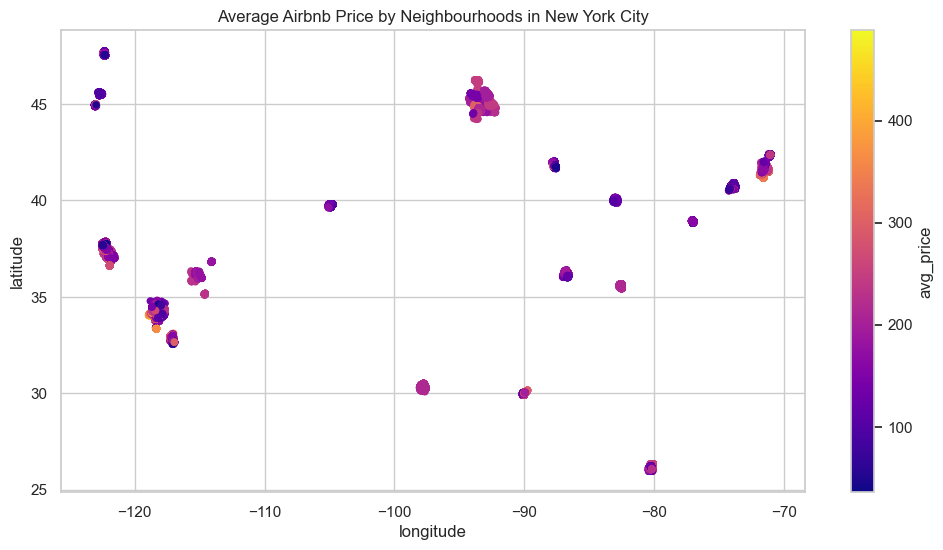

In [60]:
nbd_avg_price = (df_2.groupby("neighbourhood").mean().reset_index().rename(columns={"price": "avg_price"}))[['neighbourhood', 'avg_price']]
nbd_avg_price = (nbd_avg_price.sort_values("avg_price"))

# Group the data by neighbourhood and calculate the average price
nbd_avg_price = df_2.groupby("neighbourhood")["price"].mean()

# Create a new DataFrame with the average price for each neighbourhood
nbd_prices = pd.DataFrame({"neighbourhood": nbd_avg_price.index, "avg_price": nbd_avg_price.values})

# Merge the average price data with the original DataFrame trying to find where the coordinates belong from the latitude and longitude
df_merged = df_2.merge(nbd_prices, on="neighbourhood")

# Create the scattermapbox plot
fig = df_merged.plot.scatter(x="longitude", y="latitude", c="avg_price", title="Average Airbnb Price by Neighbourhoods in New York City", figsize=(12,6), cmap="plasma")

### Insights from "Average Airbnb Price by Neighbourhoods in New York City"

##### Price Variation Across Locations

- The color gradient represents the average price per neighborhood, ranging from low (dark purple) to high (yellow/orange).
- There are certain clusters where prices are significantly higher (lighter colors), indicating premium Airbnb areas.

##### Geographic Distribution

- The listings are scattered across different locations, showing that Airbnb properties exist beyond central New York City.
- Some areas have a dense concentration of listings, possibly indicating popular tourist hotspots.

##### High-Priced Listings

- A few locations exhibit bright yellow/orange dots, suggesting luxury accommodations or highly in-demand areas.
- These could be near major attractions, business hubs, or exclusive residential zones.

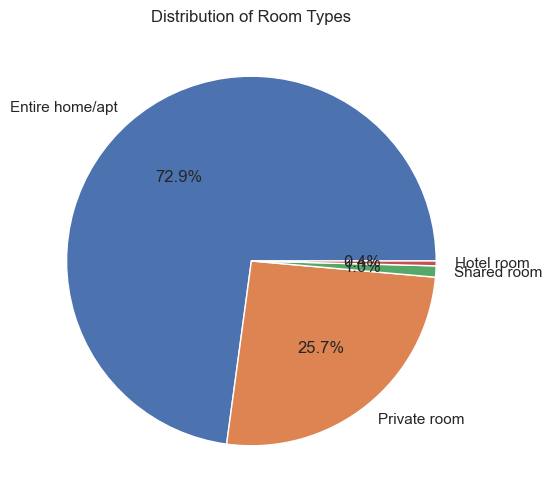

In [61]:
# Plotting a pie chart for room types
room_type_counts = df_2['room_type'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(room_type_counts, labels=room_type_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Room Types')
plt.show()

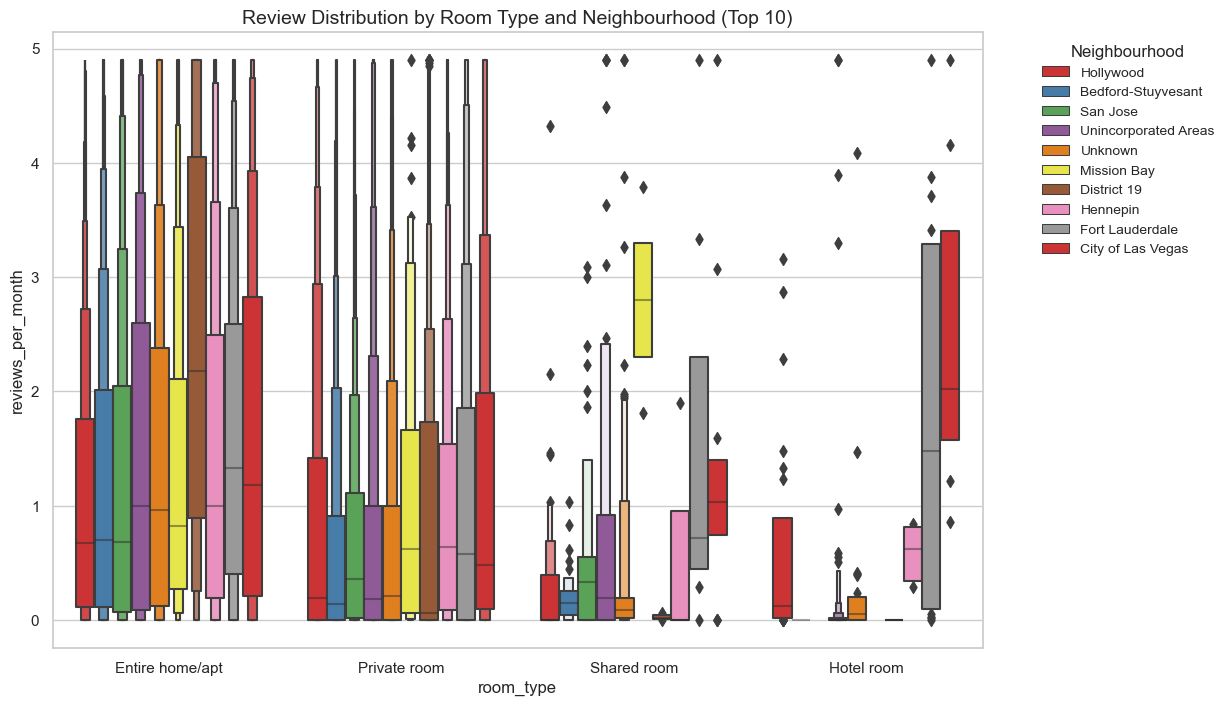

In [62]:
# Calculate the top 10 neighborhoods by the total number of reviews
top_10_neighbourhoods = df_2.groupby('neighbourhood')['number_of_reviews'].sum().nlargest(10).index

# Filter the dataframe to include only the top 10 neighborhoods
df_filtered = df_2[df_2['neighbourhood'].isin(top_10_neighbourhoods)]

# Create a violinplot for the filtered data
f, ax = plt.subplots(figsize=(12, 8))
sns.boxenplot(x='room_type', y='reviews_per_month', hue='neighbourhood', data=df_filtered, palette='Set1')

# Set the title
ax.set_title('Review Distribution by Room Type and Neighbourhood (Top 10)', fontsize='14')

# Adjust the legend position and size
plt.legend(title='Neighbourhood', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='10', title_fontsize='12', frameon=False)

# Show the plot
plt.show()

### Insights from "Review Distribution by Room Type and Neighbourhood (Top 10)"

##### General Trends

- Dominant Room Types: Entire homes/apartments and private rooms are the most frequent listing types.
- Review Variability: The number of reviews per month varies considerably across all room types and neighborhoods.

##### Room Type Observations

- Entire Home/Apt & Private Room: These have the highest review counts and the broadest range of reviews per month.
- Shared Room: Generally receives fewer reviews per month compared to other types.

##### Neighborhood Observations

- Variable Review Volume: Review counts differ significantly among the top 10 neighborhoods for each room type.
- High Engagement Neighborhoods: Hollywood and Bedford-Stuyvesant show particularly high review volumes, especially for entire homes/apartments.

Text(0.5, 1.0, 'Distribution of type of rooms')

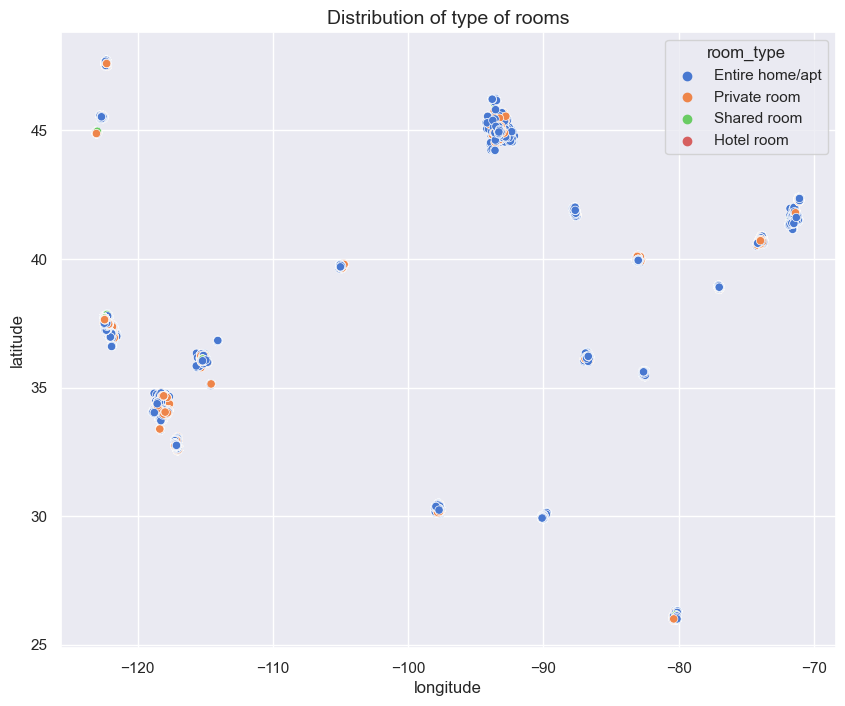

In [63]:
# set the default figure size for the seaborn library
sns.set(rc={"figure.figsize": (10, 8)})

# create a scatter plot that displays the longitude and latitude of the listings in the Airbnb dataset with room_types.
ax = sns.scatterplot(x=df_2.longitude, y=df_2.latitude, hue=df_2.room_type, palette='muted')

# set the title of the plot
ax.set_title('Distribution of type of rooms', fontsize='14')

### Insights from the above Scatterplot

- Geographic Clustering: The listings are not evenly distributed geographically. Instead, they appear to be clustered in several distinct areas across the map.

- Dominant Room Types in Clusters: In most of the identified clusters, "Entire home/apt" (blue) and "Private room" (orange) seem to be the most prevalent room types.

- Scarcity of Shared Rooms: "Shared room" listings (green) appear to be quite rare across all the plotted locations. There are very few green dots visible.

- Limited Hotel Room Presence: "Hotel room" listings (red) are also less frequent than "Entire home/apt" and "Private room," although they are slightly more common than "Shared rooms."

- Cluster around Longitude -120: There's a noticeable cluster of listings around the longitude -120, spanning a range of latitudes. This area seems to have a mix of all four room types, although "Entire home/apt" and "Private room" are still dominant.

- Cluster around Longitude -90: Another significant cluster is visible around the longitude -90, again showing a predominance of "Entire home/apt" and "Private room" listings.

- Other Smaller Clusters: There are other smaller groupings of listings visible at different longitude and latitude coordinates.

- Potential for Regional Differences: The clustering suggests that the popularity or availability of different room types might vary significantly depending on the specific geographic region.

In [64]:
# Group the DataFrame by the minimum_nights column and count the number of rows in each group
min_nights_count = df_2.groupby('minimum_nights').size().reset_index(name = 'count')

# Sort the resulting DataFrame in descending order by the count column
min_nights_count = min_nights_count.sort_values('count', ascending=False)

# Select the top 10 rows
min_nights_count = min_nights_count.head(15)

# Reset the index
min_nights_count = min_nights_count.reset_index(drop=True)

# Display the resulting DataFrame
min_nights_count 

minimum_nights  count
0              1.0  56654
1              2.0  53424
2             30.0  50457
3              3.0  25468
4             31.0  12089
5              4.0   6827
6              5.0   5135
7              7.0   4613
8             72.0   3672
9             32.0   3210
10            29.0   2059
11            28.0   1806
12            14.0   1303
13             6.0   1153
14            10.0    816

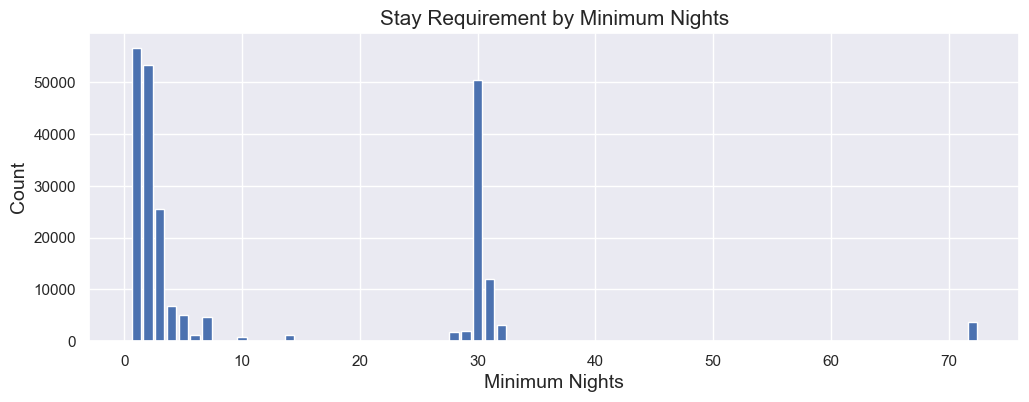

In [65]:
# Extract the minimum_nights and count columns from the DataFrame
minimum_nights = min_nights_count['minimum_nights']
count = min_nights_count['count']

# Set the figure size
plt.figure(figsize=(12, 4))

# Create the bar plot
plt.bar(minimum_nights, count)

# Add axis labels and a title
plt.xlabel('Minimum Nights', fontsize='14')
plt.ylabel('Count', fontsize='14')
plt.title('Stay Requirement by Minimum Nights', fontsize='15')

# Show the plot
plt.show()

### Insights from "Stay Requirement by Minimum Nights"

- The histogram reveals that most listings require very short minimum stays, specifically 1 or 2 nights. 
- There's also a significant number of listings with a 30-night minimum. Requirements for other durations, especially between roughly 8 and 29 nights, are much less common. 
- A small number of listings have a notably long minimum stay of 72 nights.

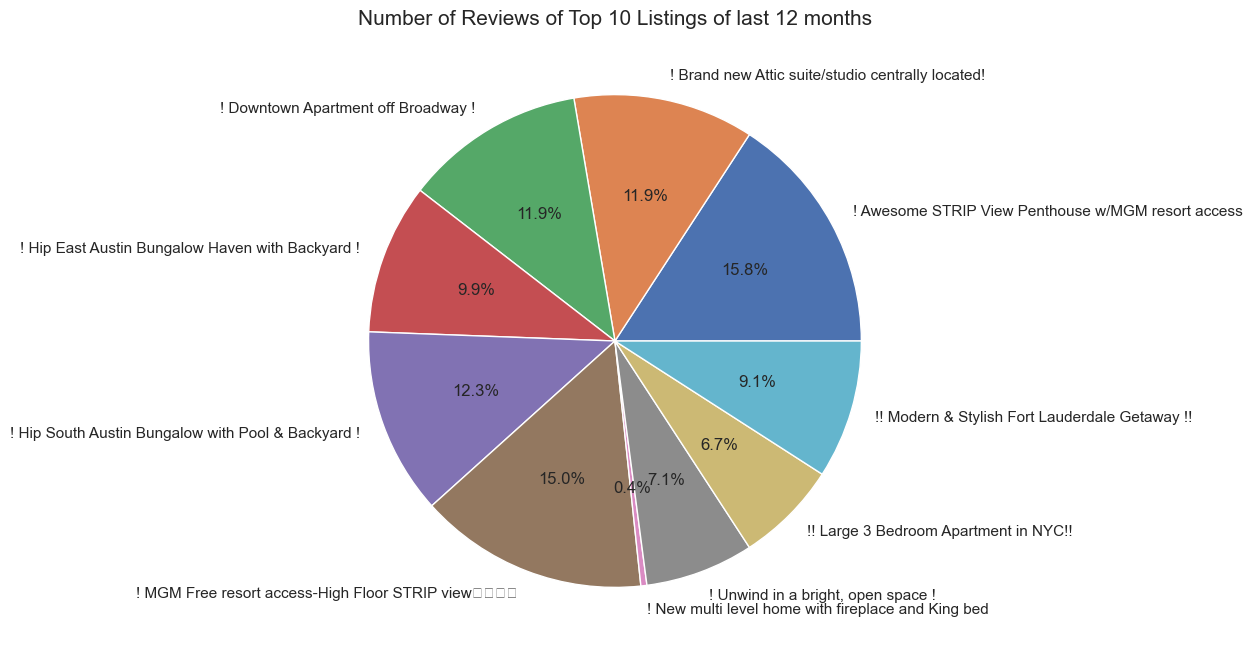

In [66]:
# Group the data by neighborhood group and calculate the total number of reviews
reviews_by_name = df_2.groupby("name")["number_of_reviews_ltm"].sum().head(10)

# Create a pie chart
plt.pie(reviews_by_name, labels=reviews_by_name.index, autopct='%1.1f%%')
plt.title("Number of Reviews of Top 10 Listings of last 12 months", fontsize='15')

# Display the chart
plt.show()

Text(0, 0.5, 'Count')

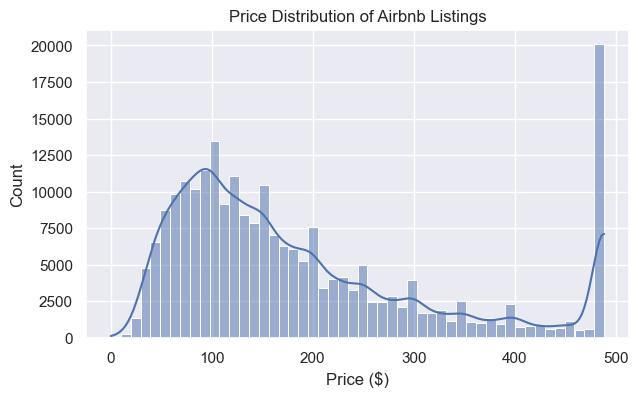

In [67]:
# Histogram for price distribution

# for mean
plt.figure(figsize=(7, 4))
sns.histplot(df_2['price'], bins=50, kde=True)
plt.title("Price Distribution of Airbnb Listings")
plt.xlabel("Price ($)")
plt.ylabel("Count")

- Right-Skewed Distribution: Most listings are priced lower.

- Lower Price Concentration: A large number of listings fall below $200.

- Long Tail: Fewer listings have much higher prices, extending up to $500.

- Price Clustering: Prices appear to group around certain points.

- Spike at $500: There's a noticeable increase in listings priced exactly at $500.

- Mean vs. Median: The average price is likely higher than the median price due to the skew.

- Potential for Transformation: The skewness might necessitate price transformations for some analyses.



In [68]:
#Since the price is right skewed, apply the log transformation directly to the price column
df_2['price'] = np.log1p(df_2['price']) 

Text(0, 0.5, 'Count')

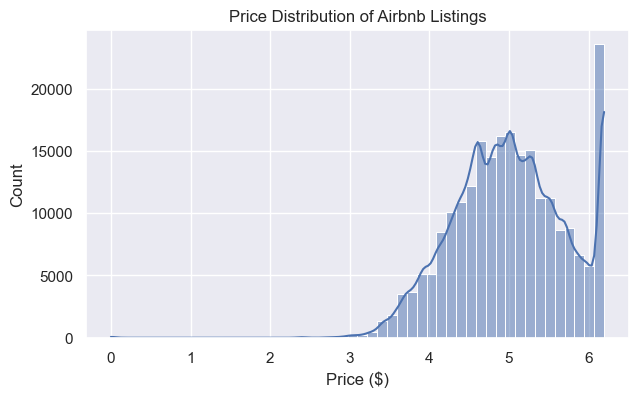

In [69]:
# Histogram for price distribution after log transformation
plt.figure(figsize=(7, 4))
sns.histplot(df_2['price'], bins=50, kde=True)
plt.title("Price Distribution of Airbnb Listings")
plt.xlabel("Price ($)")
plt.ylabel("Count")

- More Normal Distribution: Log transformation made the price distribution less skewed and more symmetrical.
- Single Peak: A more prominent central price point is visible after the transformation.
- Reduced Spread: The range of prices is compressed on the log scale.
- Clearer Central Tendency: It's easier to see the typical price range in the log-transformed data.
- Better for Analysis: This distribution is likely better suited for statistical modeling.
- Emphasis on Relative Differences: The log scale highlights proportional price changes.

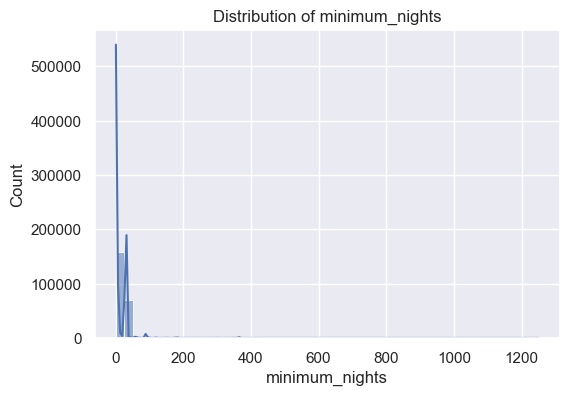

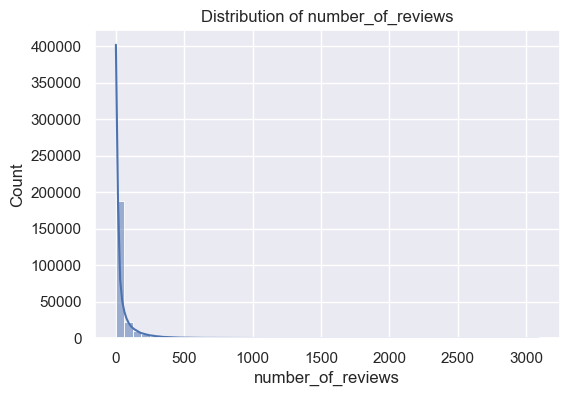

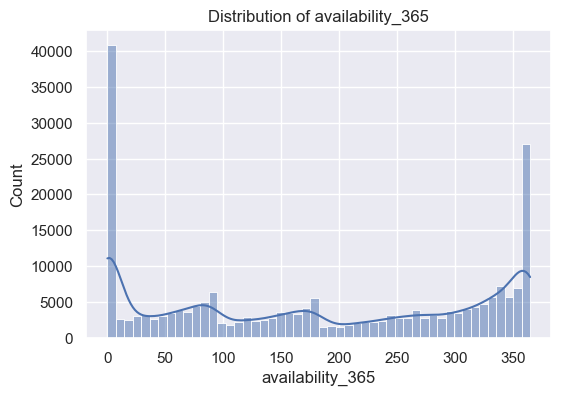

In [70]:
# Check distribution of numerical features
num_cols = ['minimum_nights', 'number_of_reviews', 'availability_365']
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=50)
    plt.title(f"Distribution of {col}")
    plt.show()

In [72]:
# Apply log1p transformation to 'minimum_nights' and 'number_of_reviews'
df_2['log_minimum_nights'] = np.log1p(df_2['minimum_nights'])
df_2['log_number_of_reviews'] = np.log1p(df_2['number_of_reviews'])

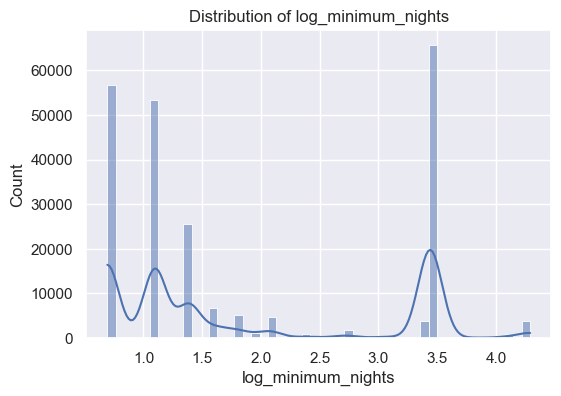

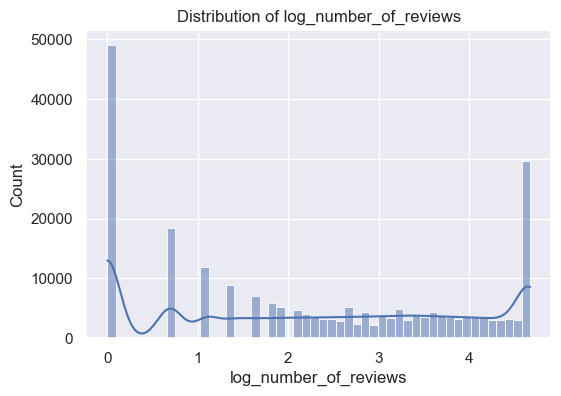

In [73]:
# Check the distribution of transformed columns
log_num_cols = ['log_minimum_nights', 'log_number_of_reviews']
for col in log_num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_2[col], kde=True, bins=50)
    plt.title(f"Distribution of {col}")
    plt.show()

Text(0.5, 1.0, 'Feature Correlation Heatmap')

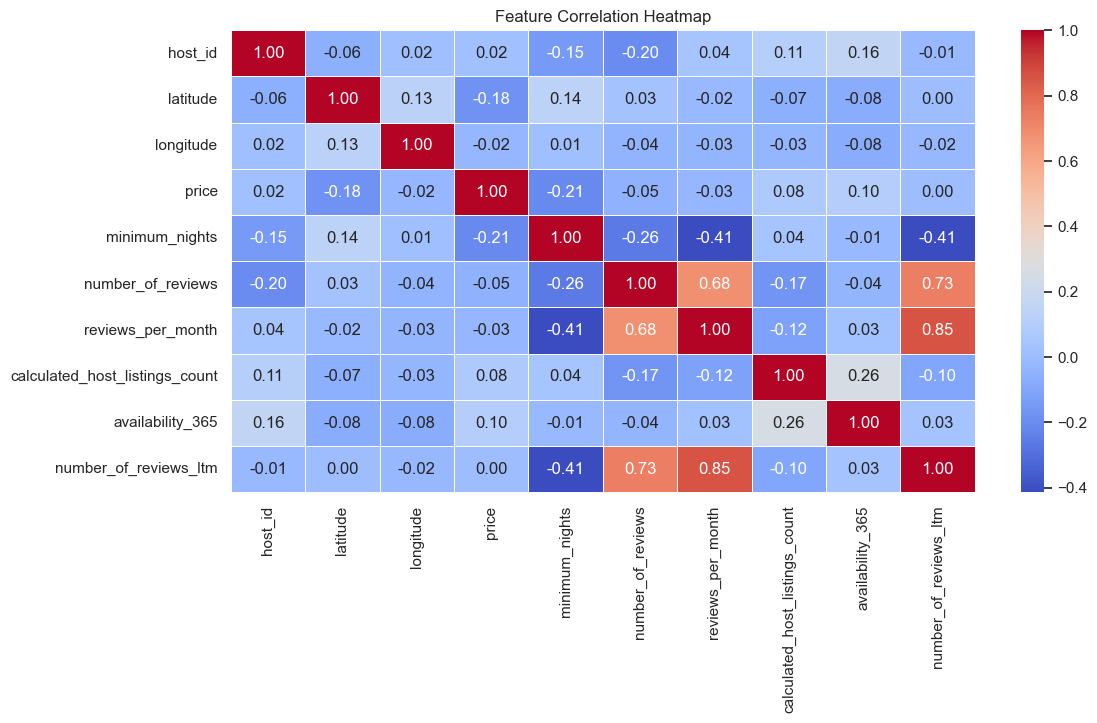

In [41]:
import numpy as np

# Compute the correlation matrix
corr_matrix = df_2.corr()

# Create a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")

### Insights from the "Correlation Heatmap"

##### Strong Positive Correlations:

- `number_of_reviews` and `reviews_per_month` (0.68): This is expected. Listings with more reviews overall tend to get more reviews per month.
- `reviews_per_month` and `number_of_reviews_ltm` (0.85): The number of reviews in the last twelve months has a very strong positive correlation with the average monthly review rate. This is logical, as recent reviews heavily influence the monthly average.
- `number_of_reviews` and `number_of_reviews_ltm` (0.73): The total number of reviews is also strongly correlated with the number of reviews in the last twelve months. Listings with many total reviews are also likely to have accumulated a significant number in the recent past.
- `calculated_host_listings_count` and `availability_365` (0.26): Hosts with more listings tend to have higher overall availability across their properties.

##### Strong Negative Correlations:

- `minimum_nights` and `reviews_per_month` (-0.41): Listings with longer minimum stay requirements tend to have fewer reviews per month. This could be because they attract fewer bookings, leading to fewer opportunities for reviews.
- `minimum_nights` and `number_of_reviews_itm` (-0.41): Similar to the above, longer minimum stays are associated with lower recent review counts.
- `minimum_nights` and `number_of_reviews` (-0.26): Listings with longer minimum stays tend to have fewer total reviews.

##### Moderate Correlations:

- `latitude` and `longitude` (0.13): There's a slight positive correlation, which is expected as geographic coordinates can sometimes cluster.
- `calculated_host_listings_count` and `host_id` (0.11): Hosts with higher listing counts have different host IDs (though this is more of a categorical relationship being numerically represented).
- `price` and `availability_365` (0.10): Slightly higher priced listings might have higher availability.
- `price` and `calculated_host_listings_count` (0.08): There's a weak positive correlation, suggesting hosts with more listings might have slightly higher prices on average.

##### Weak or No Significant Correlations (Close to 0):

- `host_id` with `latitude`, `longitude`, `price`, `minimum_nights`, `reviews_per_month`, `number_of_reviews_ltm`: Host ID doesn't strongly predict these numerical features.
- `latitude` with `price`, `reviews_per_month`, `calculated_host_listings_count`, `number_of_reviews_ltm`: Latitude has weak correlations with these.
- `longitude` with `price`, `reviews_per_month`, `calculated_host_listings_count`, `number_of_reviews_ltm`: Longitude has weak correlations with these.
- `price` with `host_id`, `latitude`, `longitude`, `number_of_reviews`, `reviews_per_month`, `number_of_reviews_ltm`: Price has weak correlations with most features, except a slight positive with availability.
- `availability_365` with `host_id`, `latitude`, `longitude`, `number_of_reviews`, `reviews_per_month`, `number_of_reviews_ltm`: Availability has weak correlations with most features.

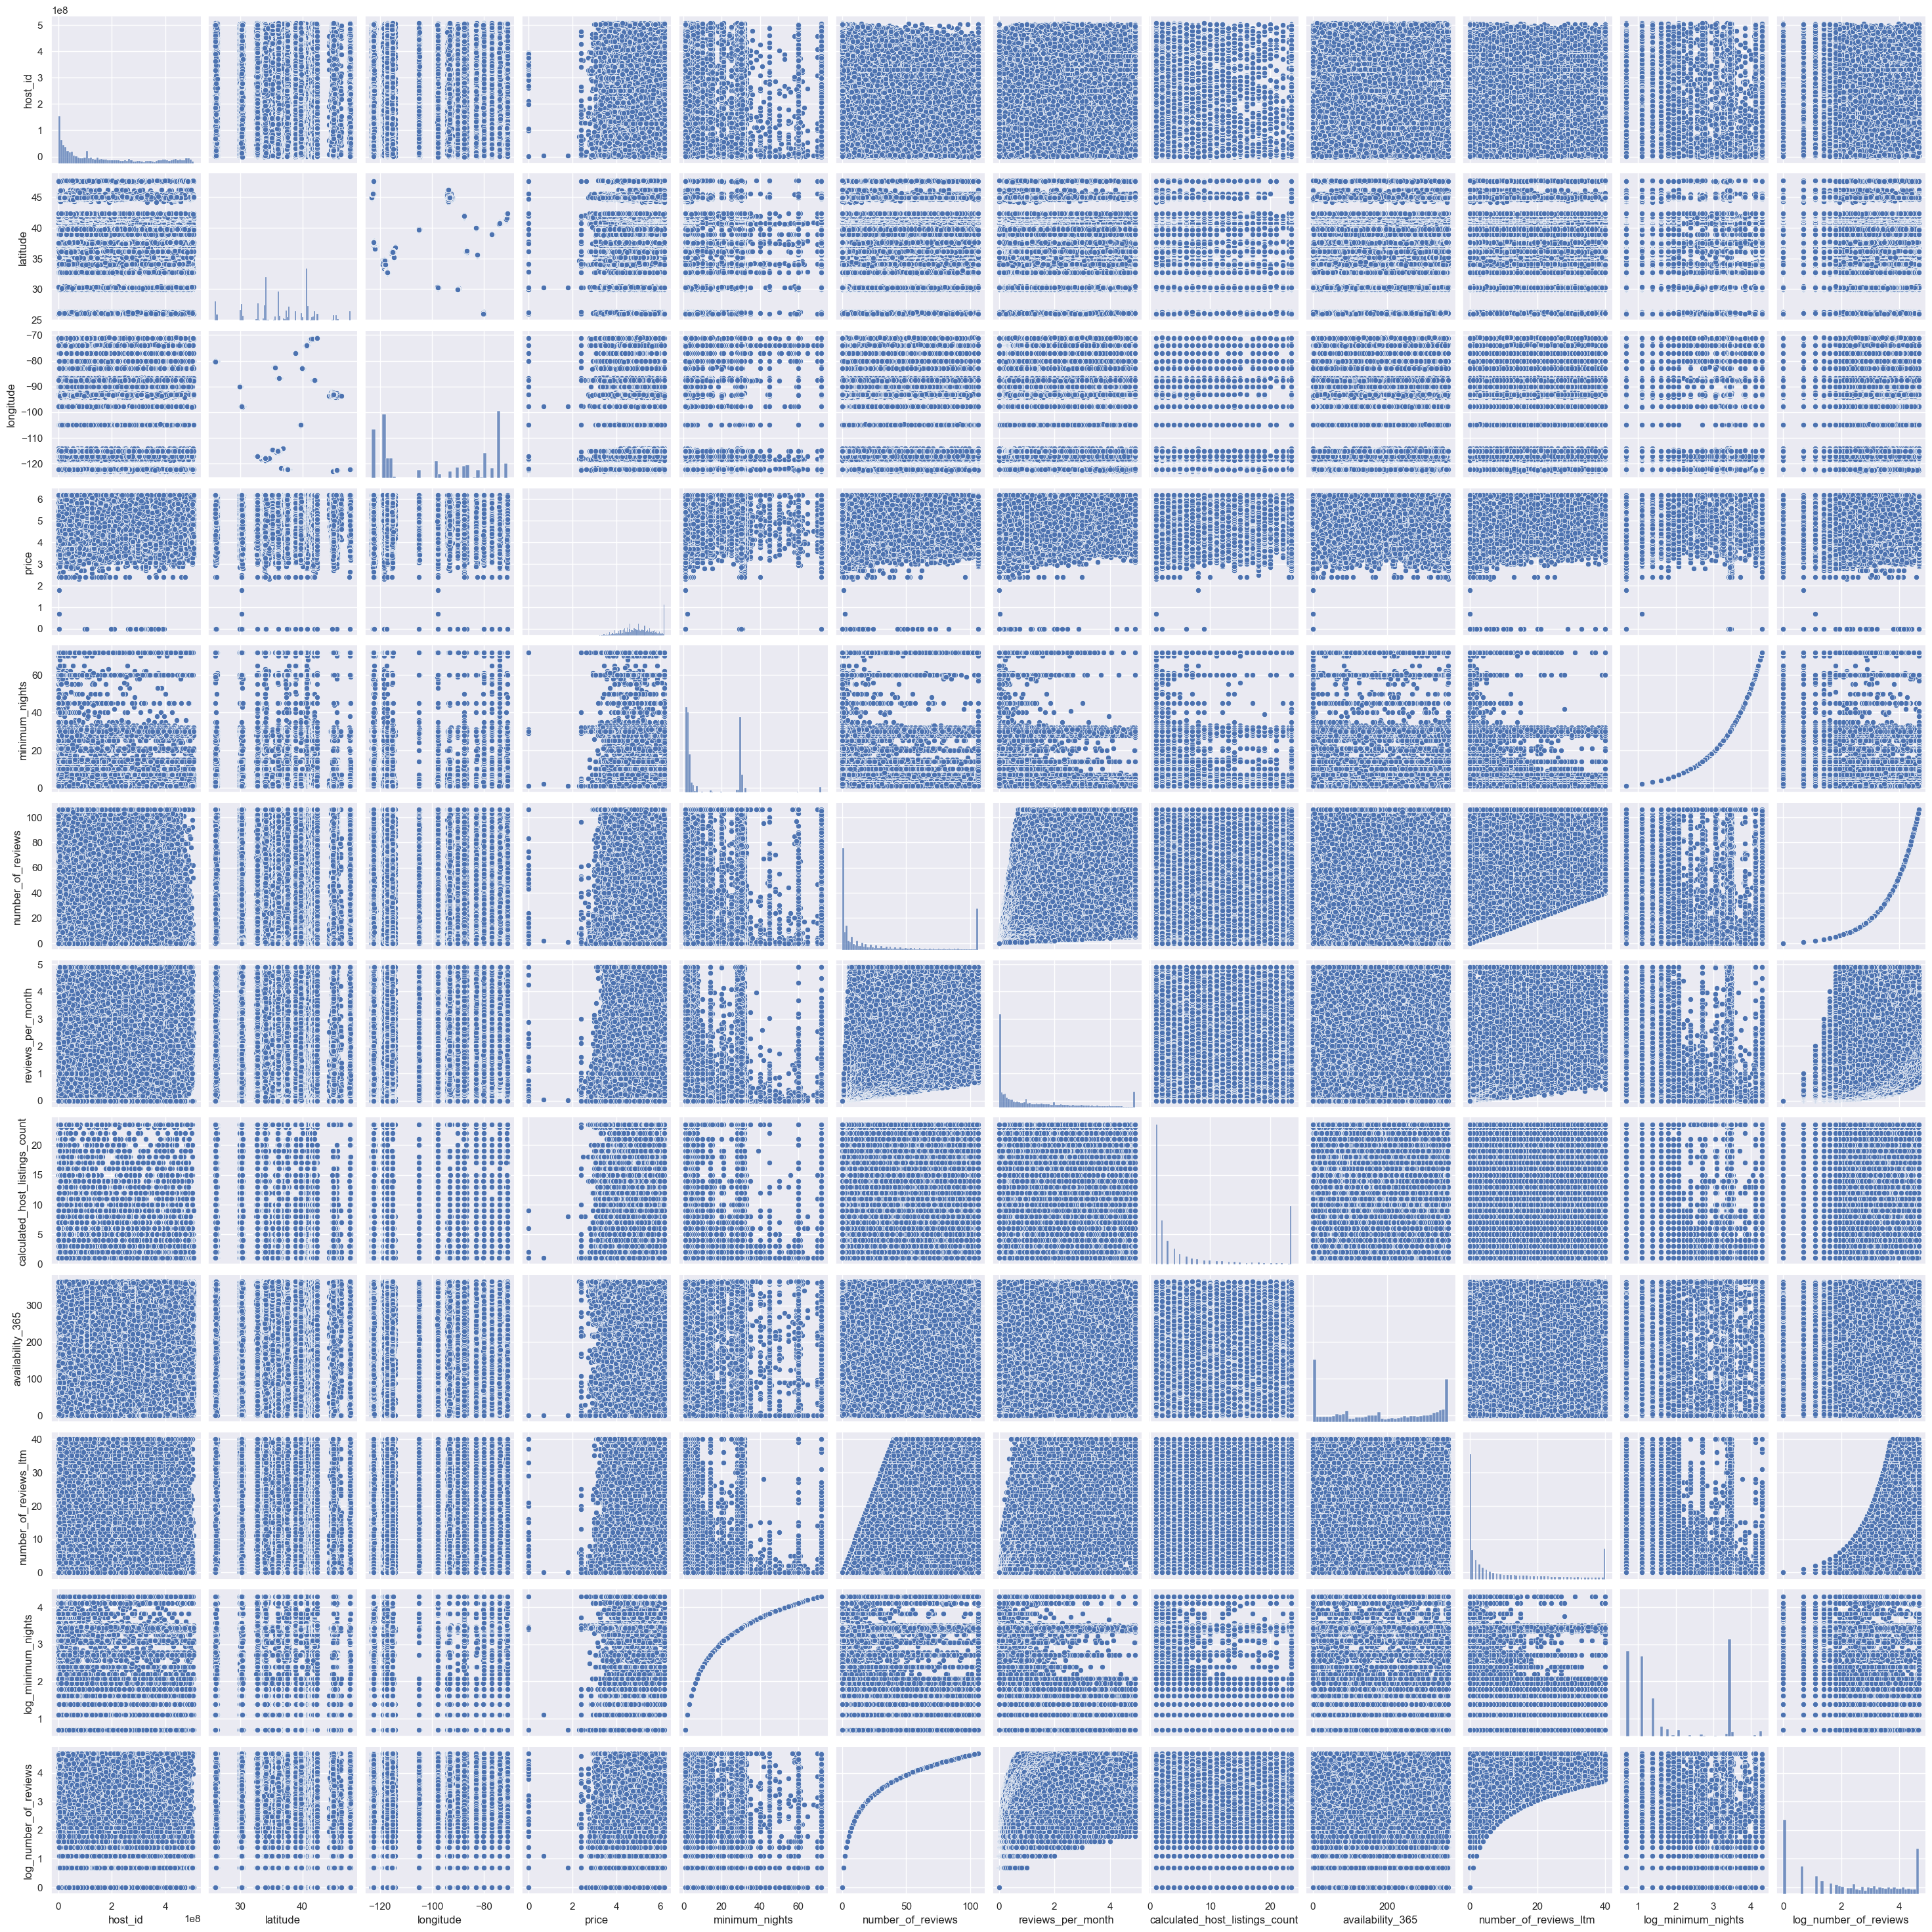

In [75]:
# create a pairplot using the seaborn library to visualize the relationships between different variables in the Airbnb dataset
sns.pairplot(df_2)

# show the plot
plt.show()



- A pair plot consists of multiple scatterplots arranged in a grid, with each scatterplot showing the relationship between two variables

- It can be used to visualize relationships between multiple variables and to identify patterns in the data.


## Model Preprocessing and Buliding

Building a Regression Model for Airbnb Prices: A Step-by-Step Guide

In this section, we'll walk through the process of creating a model to predict the prices of Airbnb listings. We'll be using Python and the popular **scikit-learn** library, which provides tools for building machine learning models. Don't worry if you're new to this – we'll explain each step along the way!

Our goal is to create a model that can learn from the characteristics of Airbnb listings (like the type of room, location, and number of reviews) and then predict their prices. To do this, we'll follow these key steps:

- **Preparing the Data:** Airbnb listings have different kinds of information. Some are numbers (like latitude and longitude), and others are categories (like room type and neighbourhood). We need to get this data ready for our model.

- **Splitting the Data:** To see how well our model learns, we'll split our data into two parts: a training set (which the model will learn from) and a testing set (which we'll use to see how well it predicts prices on new, unseen listings).

- **Setting up a Model Pipeline:** We'll create a structured way to process our data and train our model. This is like setting up an assembly line where the data goes through different stages.

- **Choosing a Model:** For this initial step, we'll use a simple model called LinearRegression. Think of this as trying to find a straight line that best fits the relationship between the listing features and its price. We can always try more complex models later!

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Preprocess categorical columns with one-hot encoding

categorical_columns = ['room_type', 'neighbourhood', 'city']
numerical_columns = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

#Features and target
X = df_2[numerical_columns + categorical_columns]
y = df_2['price']

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Create a preprocessing pipeline for categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_columns),  #Keep numerical features as they are
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)  #One-hot encode categorical features
    ])

#Create a regression pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())  # You can replace this with any other regressor
])

### Training and Evaluating the Regression Model

Now that we've set up our model pipeline, the next step is to train the model using the prepared training data. This is where the LinearRegression algorithm learns the relationships between the listing features and their corresponding prices. After training, we'll evaluate how well the model performs on the unseen testing data by comparing its predictions to the actual prices.

Here's how we'll do it:

- **Training the Model:** We'll use the fit method of our pipeline. This method takes the training features (X_train) and the corresponding training prices (y_train) as input and allows the LinearRegression model within the pipeline to learn from this data.

- **Making Predictions:** Once the model is trained, we can use it to predict the prices for the listings in our testing set (X_test). We'll use the predict method of our trained pipeline to get these predictions, which we'll store in y_pred.

- **Evaluating the Predictions:** To understand how accurate our model's predictions are, we'll use a few common metrics:

    -   **R² Score (Coefficient of Determination):** This metric tells us how much of the variability in the actual prices is explained by our model. An R² score closer to 1 indicates a better fit.
    -    **Mean Absolute Error (MAE):** This measures the average absolute difference between our model's predictions and the actual prices. It gives us an idea of the typical size of our prediction errors.
    -    **Root Mean Squared Error (RMSE):** Similar to MAE, but it penalizes larger errors more heavily. It's another common metric to assess the overall accuracy of the regression model.

In [77]:
# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'R² Score: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {rmse}')

R² Score: 0.43210467405259323
Mean Absolute Error: 0.41585932766142014
Mean Squared Error: 0.529448284928352


##### The Linear Regression model explains about 43% of the price variation (R² = 0.43). The average prediction error in the log price is around 0.42 (MAE) and the typical spread of errors is about 0.53 (RMSE). This suggests the model has moderate predictive power, but there's room for improvement by potentially adding features or trying different models.

### Comparing Different Regression Models

In this section, we expand on our previous efforts by training and evaluating three different regression models to predict Airbnb listing prices. By comparing the performance of these models, we aim to identify which one is best suited for this prediction task.

We will be using the same preprocessed training and testing data from the previous steps. The three models we will evaluate are:

- **Linear Regression:** As used before, this model assumes a linear relationship between the features and the target variable (price).
- **Decision Tree Regressor:** This model learns to predict the target by creating a tree-like structure of decisions based on the features. It can capture more complex, non-linear relationships.
- **Random Forest Regressor:** This is an ensemble method that builds multiple decision trees and averages their predictions, often leading to more robust and accurate results than a single decision tree.

For each model, we will create a pipeline that includes the same preprocessing steps used earlier to ensure fair comparison. We will then train each model on the training data, make predictions on the test data, and evaluate their performance using the same metrics: R² Score, Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE). Finally, we will present the results in a table for easy comparison.

In [78]:
# Define the three regression models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Dictionary to store model performance
results = {}

for name, model in models.items():
    # Create a pipeline with the specific regressor
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Evaluate the model
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)


    results[name] = {'R² Score': r2, 'MAE': mae, 'RMSE': rmse}

# Convert results into a DataFrame for easy comparison
import pandas as pd
results_df = pd.DataFrame(results).T
print(results_df)

                   R² Score       MAE      RMSE
Linear Regression  0.432105  0.415859  0.529448
Decision Tree      0.241236  0.438714  0.611988
Random Forest      0.604547  0.330111  0.441811


### Comparison of Regression Model Performance

After training and evaluating the three regression models, we obtained the following performance metrics on the test data:


|         Model        | R² Score |    MAE   |   RMSE  |
|:--------------------:|:--------:|:--------:|:-------:|
|  Linear Regression   |  0.432   |  0.416   |  0.529  |
|     Decision Tree    |  0.241   |  0.439   |  0.612  |
|     Random Forest    |  0.605   |  0.330   |  0.442  |

Based on these results, we can draw the following conclusions:

- **Random Forest Outperforms the Others:** The Random Forest Regressor achieved the highest R² score (0.605), indicating that it explains a larger proportion of the variance in Airbnb listing prices compared to the other two models. It also has the lowest MAE (0.330) and RMSE (0.442), meaning its predictions are, on average, closer to the actual log-transformed prices and have less overall spread in the errors.

- **Linear Regression Shows Moderate Performance:** The Linear Regression model performed better than the Decision Tree, with an R² score of 0.432. Its MAE (0.416) and RMSE (0.529) are also lower than those of the Decision Tree, suggesting it makes more accurate predictions overall than the single Decision Tree.

- **Decision Tree Underperforms:** The Decision Tree Regressor had the lowest R² score (0.241) and the highest MAE (0.439) and RMSE (0.612). This suggests that a single, unpruned decision tree might be overfitting the training data or is not complex enough to capture the underlying relationships in the data effectively.

##### Key Takeaways:

- The Random Forest model appears to be the most effective for predicting Airbnb listing prices among the three models tested. Its ensemble nature likely allows it to capture more complex patterns in the data than the simpler Linear Regression or the single Decision Tree.

- The Linear Regression model provides a reasonable baseline, performing better than a simple Decision Tree.

- The Decision Tree model, in its current configuration, is the least effective and might benefit from hyperparameter tuning (e.g., controlling the depth of the tree) or being used within an ensemble method like Random Forest.


## Project Conclusion: Leveraging Machine Learning for Airbnb Price Prediction

This project successfully developed and evaluated several regression models for predicting Airbnb listing prices. Our analysis revealed that the Random Forest Regressor outperformed both the Linear Regression and Decision Tree models, demonstrating a higher ability to explain the variance in prices (R² of approximately 0.605) and exhibiting lower prediction errors. This suggests that the Random Forest model is well-suited to capture the complex relationships between listing features and their prices within the dataset.

The Linear Regression model provided a reasonable baseline, while the single Decision Tree model showed the weakest performance, highlighting the benefits of ensemble methods like Random Forest.

The size of the dataset (over 230,000 listings) proved to be a significant advantage, allowing us to train a robust Random Forest model that is likely to generalize well to new data.

#### Key findings and potential applications of this project include:

- **Significant Predictors of Price:** While not explicitly detailed in this summary, the model implicitly identifies the features that are most influential in determining price. Further analysis of feature importance from the Random Forest model could provide valuable insights into these key drivers.

- **Potential for Dynamic Pricing Tools:** The developed model could serve as the foundation for building dynamic pricing tools for Airbnb hosts, helping them adjust prices in real-time based on listing characteristics and market conditions.

- **Enhanced Market Understanding:** The insights from this project contribute to a better understanding of the factors that drive Airbnb pricing, which can be beneficial for market analysis and strategic decision-making for both hosts and guests.